# MSA 2025 Phase 2 - Part 1


In [7]:
# # Import necessary libraries
import sklearn
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# %matplotlib inline

## 1. Find all variables and understand them


### Overview dataset

In [8]:
# Read the dataset
df = pd.read_csv("datasets/X store sales/store_sales.csv", encoding="ISO-8859-1")
df.head(10)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
3,6,CA-2014-115812,6/9/2014,6/14/2014,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,FUR-FU-10001487,Furniture,Furnishings,Eldon Expressions Wood and Plastic Desk Access...,48.8600,7,0.00,14.1694
4,11,CA-2014-115812,6/9/2014,6/14/2014,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,FUR-TA-10001539,Furniture,Tables,Chromcraft Rectangular Conference Tables,1706.1840,9,0.20,85.3092
5,24,US-2017-156909,7/16/2017,7/18/2017,Second Class,SF-20065,Sandra Flanagan,Consumer,United States,Philadelphia,...,19140,East,FUR-CH-10002774,Furniture,Chairs,"Global Deluxe Stacking Chair, Gray",71.3720,2,0.30,-1.0196
6,25,CA-2015-106320,9/25/2015,9/30/2015,Standard Class,EB-13870,Emily Burns,Consumer,United States,Orem,...,84057,West,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,1044.6300,3,0.00,240.2649
7,28,US-2015-150630,9/17/2015,9/21/2015,Standard Class,TB-21520,Tracy Blumstein,Consumer,United States,Philadelphia,...,19140,East,FUR-BO-10004834,Furniture,Bookcases,"Riverside Palais Royal Lawyers Bookcase, Royal...",3083.4300,7,0.50,-1665.0522
8,30,US-2015-150630,9/17/2015,9/21/2015,Standard Class,TB-21520,Tracy Blumstein,Consumer,United States,Philadelphia,...,19140,East,FUR-FU-10004848,Furniture,Furnishings,"Howard Miller 13-3/4"" Diameter Brushed Chrome ...",124.2000,3,0.20,15.5250
9,37,CA-2016-117590,12/8/2016,12/10/2016,First Class,GH-14485,Gene Hale,Corporate,United States,Richardson,...,75080,Central,FUR-FU-10003664,Furniture,Furnishings,"Electrix Architect's Clamp-On Swing Arm Lamp, ...",190.9200,5,0.60,-147.9630


In [9]:
# Show data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2121 entries, 0 to 2120
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         2121 non-null   int64  
 1   Order ID       2121 non-null   object 
 2   Order Date     2121 non-null   object 
 3   Ship Date      2121 non-null   object 
 4   Ship Mode      2121 non-null   object 
 5   Customer ID    2121 non-null   object 
 6   Customer Name  2121 non-null   object 
 7   Segment        2121 non-null   object 
 8   Country        2121 non-null   object 
 9   City           2121 non-null   object 
 10  State          2121 non-null   object 
 11  Postal Code    2121 non-null   int64  
 12  Region         2121 non-null   object 
 13  Product ID     2121 non-null   object 
 14  Category       2121 non-null   object 
 15  Sub-Category   2121 non-null   object 
 16  Product Name   2121 non-null   object 
 17  Sales          2121 non-null   float64
 18  Quantity

The dataset contains **2,121 rows** and **21 columns**.

In [10]:
# Check unique values per column
print("\nUnique values per column:")
print(df.nunique())


Unique values per column:
Row ID           2121
Order ID         1764
Order Date        889
Ship Date         960
Ship Mode           4
Customer ID       707
Customer Name     707
Segment             3
Country             1
City              371
State              48
Postal Code       454
Region              4
Product ID        375
Category            1
Sub-Category        4
Product Name      380
Sales            1636
Quantity           14
Discount           11
Profit           1777
dtype: int64


- **Category** and **Country** columns each contain only one distinct value, indicating no variability
- There are 2121 unique **Row ID**, so this column is not useful

In [11]:
# Key statistical measures for numerical columns
print("\nDescriptive Statistics:")
print(df.describe())


Descriptive Statistics:
            Row ID   Postal Code        Sales     Quantity     Discount  \
count  2121.000000   2121.000000  2121.000000  2121.000000  2121.000000   
mean   5041.643564  55726.556341   349.834887     3.785007     0.173923   
std    2885.740258  32261.888225   503.179145     2.251620     0.181547   
min       1.000000   1040.000000     1.892000     1.000000     0.000000   
25%    2568.000000  22801.000000    47.040000     2.000000     0.000000   
50%    5145.000000  60505.000000   182.220000     3.000000     0.200000   
75%    7534.000000  90032.000000   435.168000     5.000000     0.300000   
max    9991.000000  99301.000000  4416.174000    14.000000     0.700000   

            Profit  
count  2121.000000  
mean      8.699327  
std     136.049246  
min   -1862.312400  
25%     -12.849000  
50%       7.774800  
75%      33.726600  
max    1013.127000  


In [12]:
# Separate numerical and categorical columns
numerical_cols = df.select_dtypes(include=[np.number]).columns.tolist()
categorical_cols = df.select_dtypes(include=["object"]).columns.tolist()

print(f"\nNumerical columns:", numerical_cols)
print(f"Categorical columns:", categorical_cols)


Numerical columns: ['Row ID', 'Postal Code', 'Sales', 'Quantity', 'Discount', 'Profit']
Categorical columns: ['Order ID', 'Order Date', 'Ship Date', 'Ship Mode', 'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State', 'Region', 'Product ID', 'Category', 'Sub-Category', 'Product Name']


The dataset contains two main types of variables:

**Numerical Variables (6 columns):**

- `Row ID`, `Postal Code` - Identifiers
- `Sales`, `Quantity`, `Discount`, `Profit` - Core business metrics

**Categorical Variables (15 columns):**

- **Identifiers:** `Order ID`, `Customer ID`, `Product ID`
- **Temporal:** `Order Date`, `Ship Date`
- **Geographic:** `Country`, `City`, `State`, `Region`
- **Business Categories:** `Ship Mode`, `Segment`, `Category`, `Sub-Category`
- **Customer/Product:** `Customer Name`, `Product Name`

In [13]:
# Additional statistics for numerical columns
if numerical_cols:
    for col in numerical_cols:
        print(f"\n{col}:")
        print(f"  Skewness: {df[col].skew():.4f}")
        print(f"  Kurtosis: {df[col].kurtosis():.4f}")


Row ID:
  Skewness: -0.0307
  Kurtosis: -1.2027

Postal Code:
  Skewness: -0.1612
  Kurtosis: -1.4945

Sales:
  Skewness: 3.3492
  Kurtosis: 15.9168

Quantity:
  Skewness: 1.3453
  Kurtosis: 2.2215

Discount:
  Skewness: 0.9420
  Kurtosis: 0.2195

Profit:
  Skewness: -2.2855
  Kurtosis: 37.0034


### Visualize numerical columns

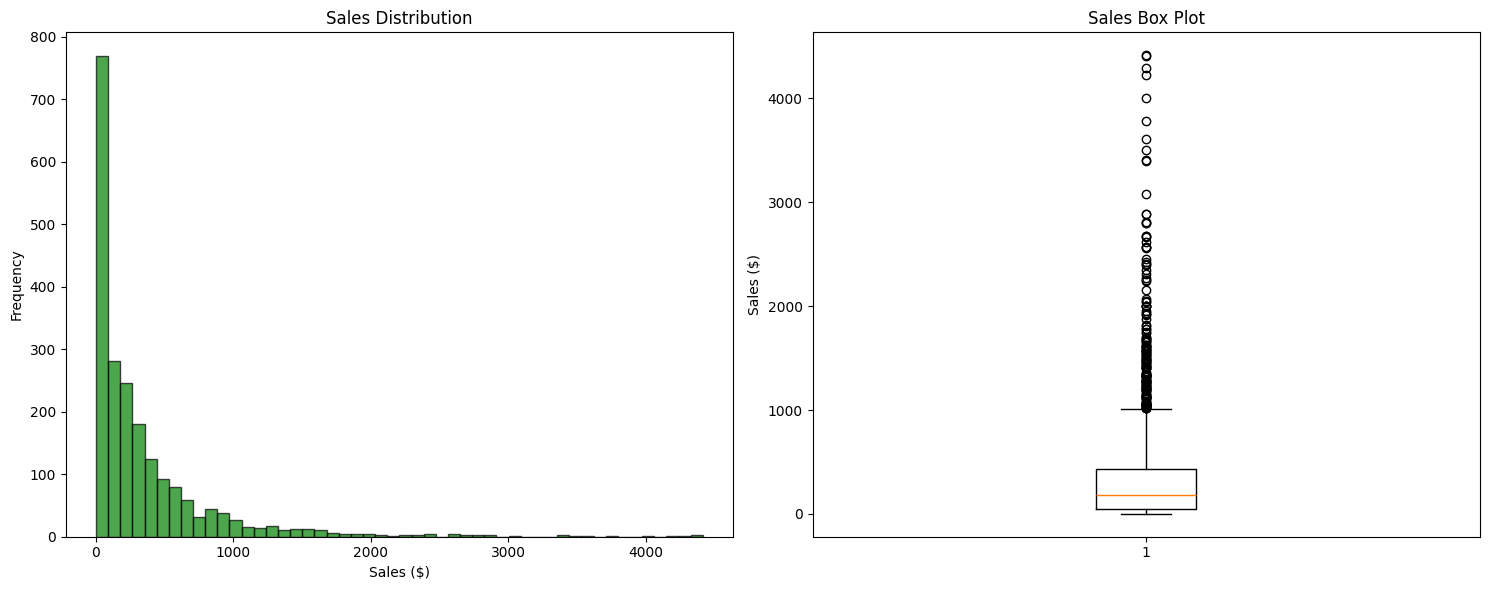

In [14]:
# Visualize numerical columns individually

# Sales - Histogram and Box plot
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Histogram
ax1.hist(df["Sales"], bins=50, alpha=0.7, color="green", edgecolor="black")
ax1.set_title("Sales Distribution")
ax1.set_xlabel("Sales ($)")
ax1.set_ylabel("Frequency")

# Box plot
ax2.boxplot(df["Sales"])
ax2.set_title("Sales Box Plot")
ax2.set_ylabel("Sales ($)")

plt.tight_layout()
plt.show()

- **Extreme Right Skewness:** Mean ($349.83) significantly exceeds median ($182.22)
- **High Variability:** Skewness = 3.35, Kurtosis = 15.92 indicate heavy right tail
- **Outlier Presence:** Significant outliers representing high-value transactions

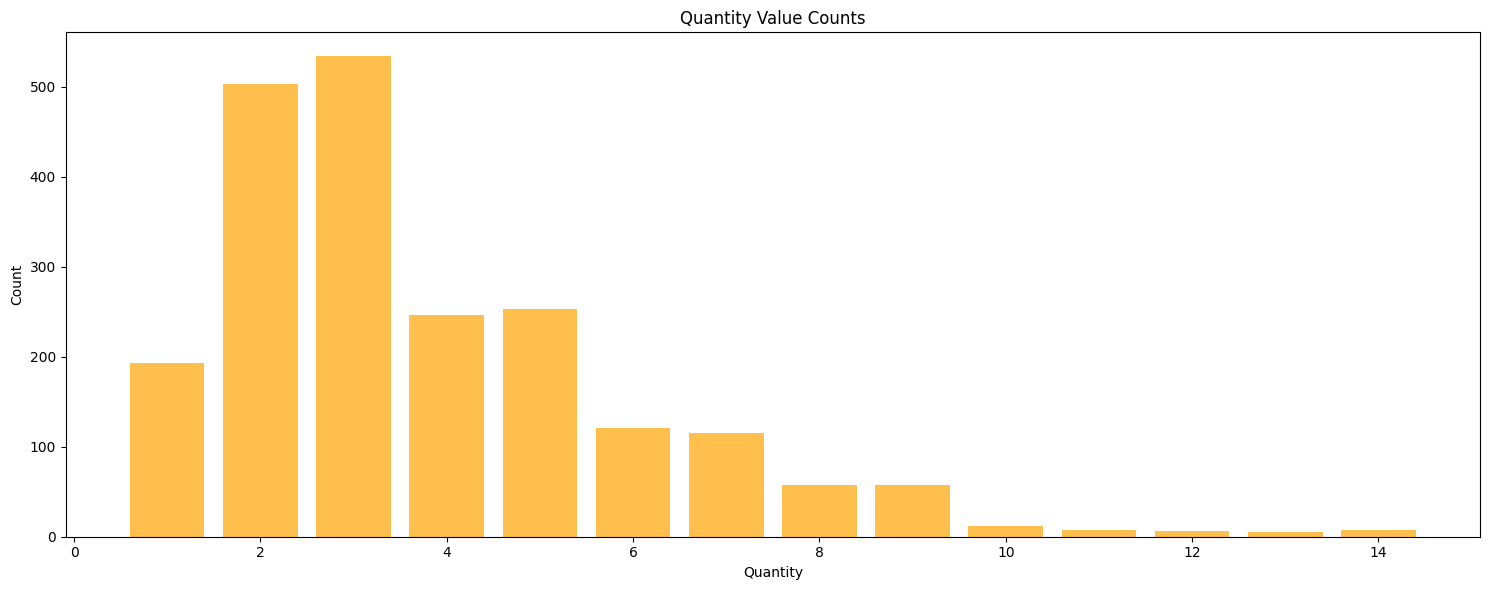

In [15]:
# Quantity - Bar plot
plt.figure(figsize=(15, 6))
quantity_counts = df["Quantity"].value_counts().sort_index()
plt.bar(quantity_counts.index, quantity_counts.values, color="orange", alpha=0.7)
plt.title("Quantity Value Counts")
plt.xlabel("Quantity")
plt.ylabel("Count")

plt.tight_layout()
plt.show()

- **Discrete Values:** Range from 1 to 14 units per order
- **Moderate Skewness:** 1.35 indicates manageable right skew
- **Reasonable Kurtosis:** 2.22 suggests well-behaved distribution


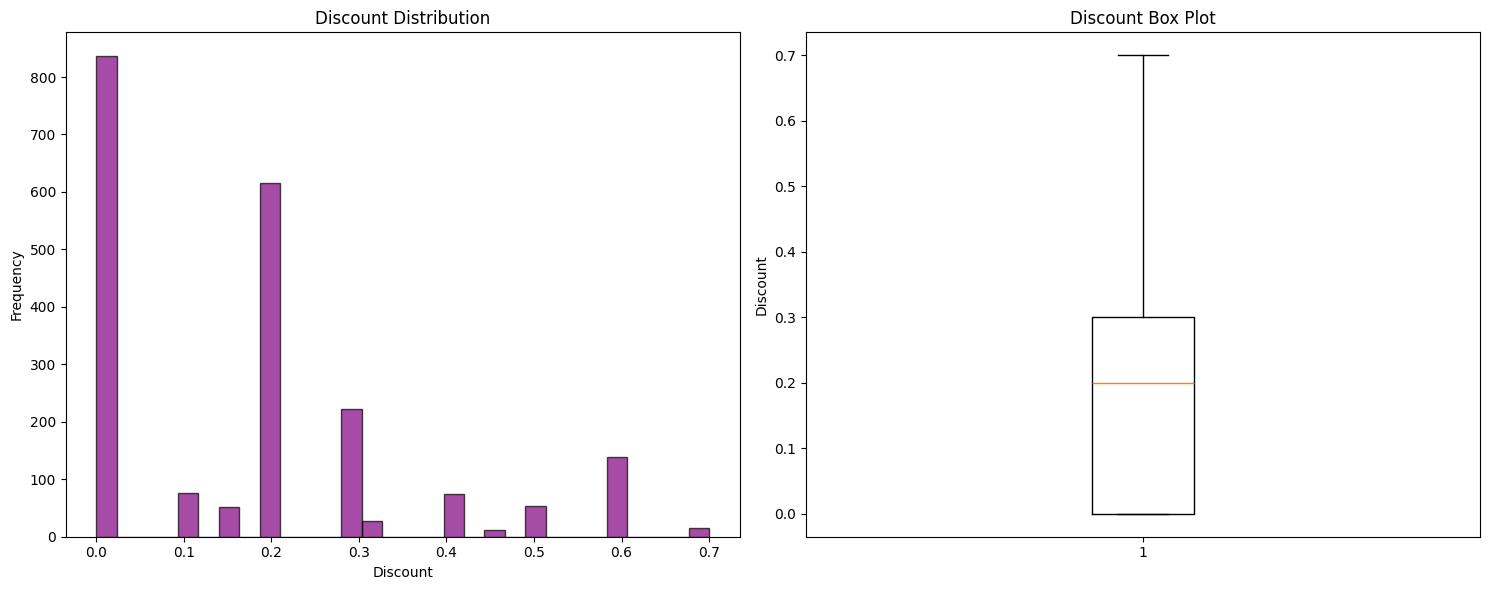

In [16]:
# Discount - Histogram and Box plot
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Histogram
ax1.hist(df["Discount"], bins=30, alpha=0.7, color="purple", edgecolor="black")
ax1.set_title("Discount Distribution")
ax1.set_xlabel("Discount")
ax1.set_ylabel("Frequency")

# Box plot
ax2.boxplot(df["Discount"])
ax2.set_title("Discount Box Plot")
ax2.set_ylabel("Discount")

plt.tight_layout()
plt.show()

- **Value Range:** 0% to 70% discount rates
- **Central Tendency:** Mean (17.39%) slightly below median (20%)
- **Distribution Shape:** Moderate right skew (0.94), low kurtosis (0.22)


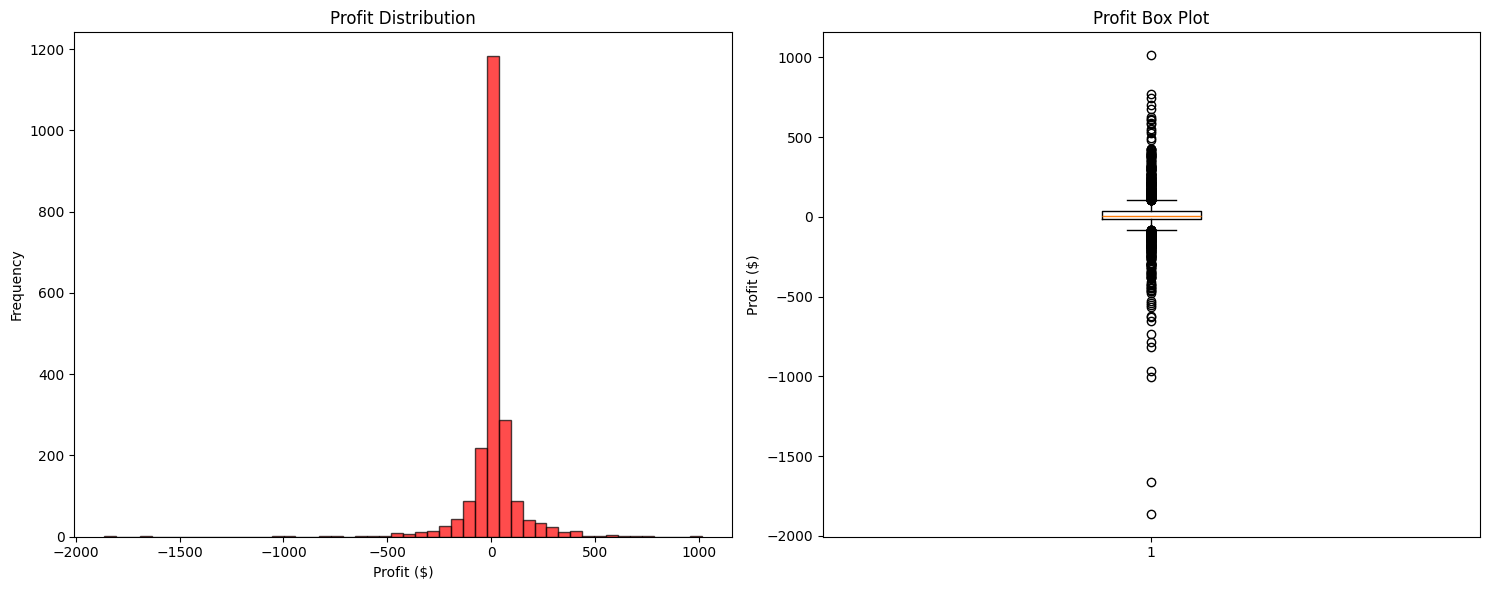

In [17]:
# Profit - Histogram and Box plot (showing both positive and negative profits)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Histogram
ax1.hist(df["Profit"], bins=50, alpha=0.7, color="red", edgecolor="black")
ax1.set_title("Profit Distribution")
ax1.set_xlabel("Profit ($)")
ax1.set_ylabel("Frequency")

# Box plot
ax2.boxplot(df["Profit"])
ax2.set_title("Profit Box Plot")
ax2.set_ylabel("Profit ($)")

plt.tight_layout()
plt.show()

- **Negative Skewness:** -2.29 indicates left-skewed distribution
- **Extreme Kurtosis:** 37.00 suggests heavy tails with many outliers
- **Value Range:** From significant losses to substantial gains

### Convert categorical data type to correct type

- Convert Order Date and Ship Date to datetime format
- Add new Shipping_Days calculation column
- Add new Year, Quarter, Month, Week, Day features

In [18]:
# Convert date columns and create time-based features
df["Order Date"] = pd.to_datetime(df["Order Date"])
df["Ship Date"] = pd.to_datetime(df["Ship Date"])

# Calculate shipping days
df["Shipping_Days"] = (df["Ship Date"] - df["Order Date"]).dt.days

# Create time-based aggregation columns from Order Date
df["Order_Year"] = df["Order Date"].dt.year
df["Order_Quarter"] = df["Order Date"].dt.quarter
df["Order_Month"] = df["Order Date"].dt.month
df["Order_Month_Name"] = df["Order Date"].dt.month_name()
df["Order_Week"] = df["Order Date"].dt.isocalendar().week
df["Order_Day"] = df["Order Date"].dt.day
df["Order_Weekday"] = df["Order Date"].dt.day_name()
df["Order_Weekday_Num"] = df["Order Date"].dt.weekday  # 0=Monday, 6=Sunday

# Create year-month and year-quarter combinations for easier aggregation
df["Year_Month"] = df["Order Date"].dt.to_period("M")
df["Year_Quarter"] = df["Order Date"].dt.to_period("Q")
df["Year_Week"] = df["Order Date"].dt.to_period("W")

## 2. Visualize data

### Visulize categorical data

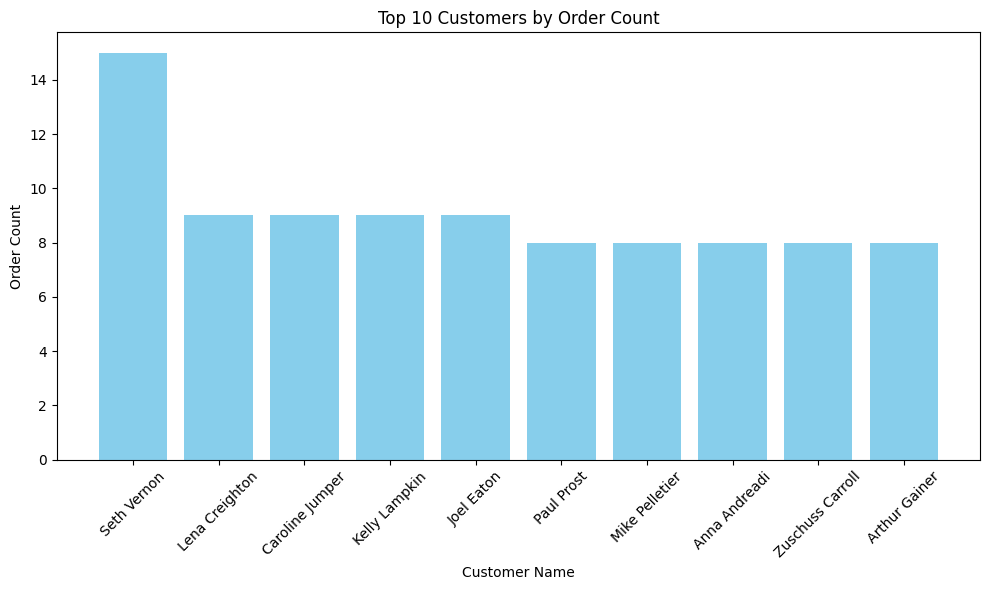

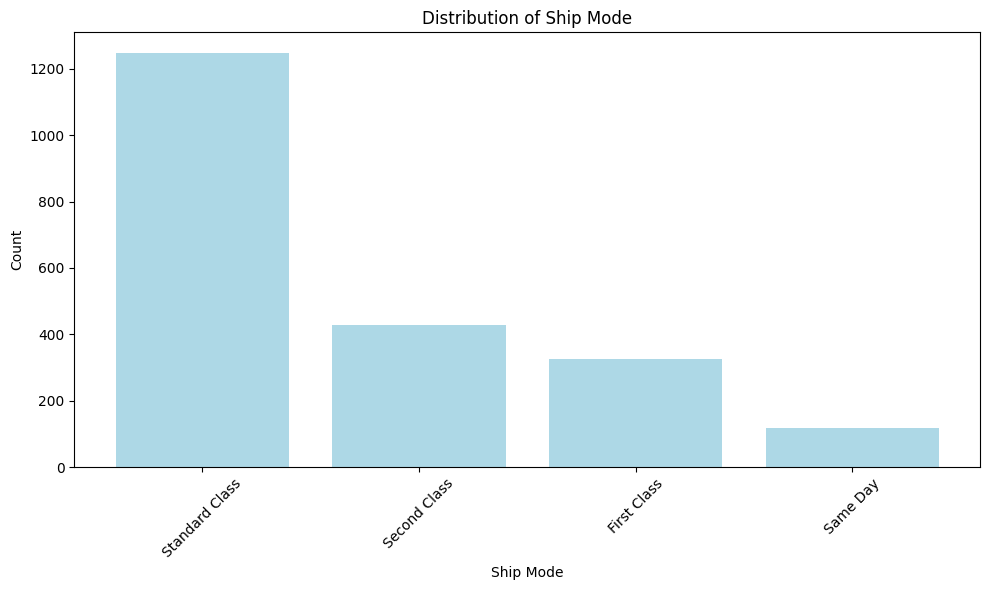

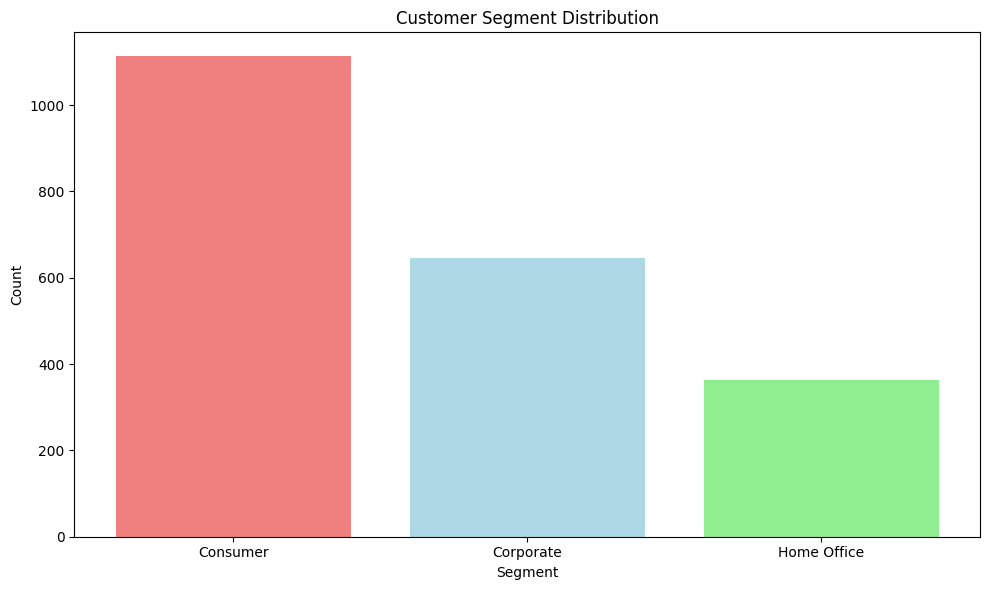

In [19]:
# Customer Name - Bar plot
plt.figure(figsize=(10, 6))
customer_counts = df["Customer Name"].value_counts().head(10)  # Top 10 customers
plt.bar(customer_counts.index, customer_counts.values, color="skyblue")
plt.title("Top 10 Customers by Order Count")
plt.xlabel("Customer Name")
plt.ylabel("Order Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Ship Mode - Bar plot

plt.figure(figsize=(10, 6))
ship_mode_counts = df["Ship Mode"].value_counts()
plt.bar(ship_mode_counts.index, ship_mode_counts.values, color="lightblue")
plt.title("Distribution of Ship Mode")
plt.xlabel("Ship Mode")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Segment - Bar chart
plt.figure(figsize=(10, 6))

segment_counts = df["Segment"].value_counts()
plt.bar(
    segment_counts.index,
    segment_counts.values,
    color=["lightcoral", "lightblue", "lightgreen"],
)
plt.title("Customer Segment Distribution")
plt.xlabel("Segment")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

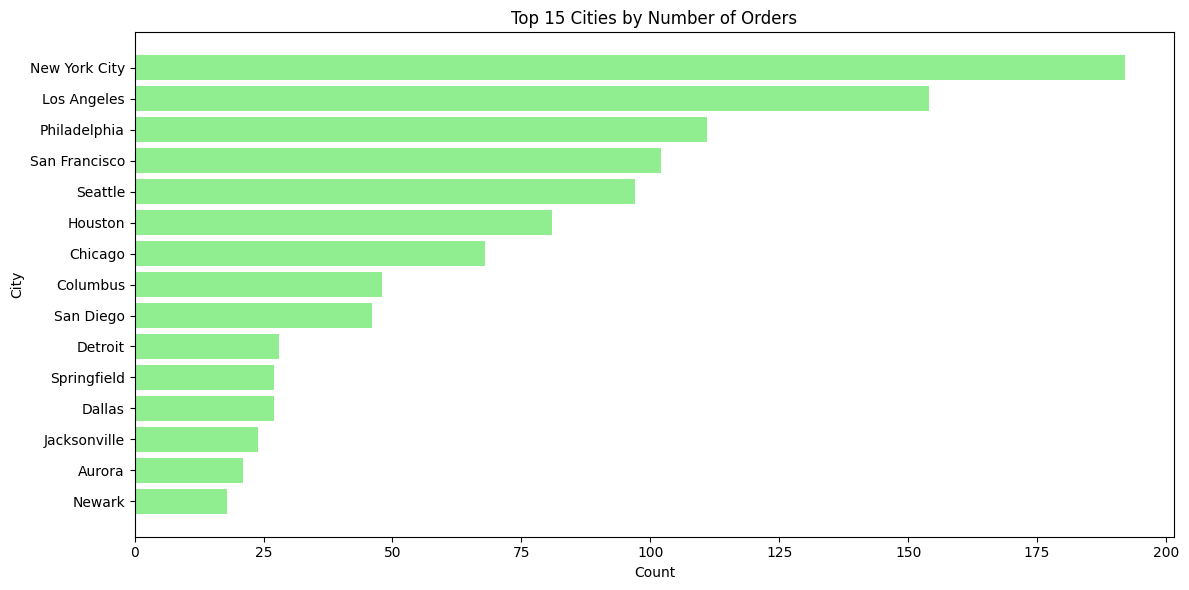

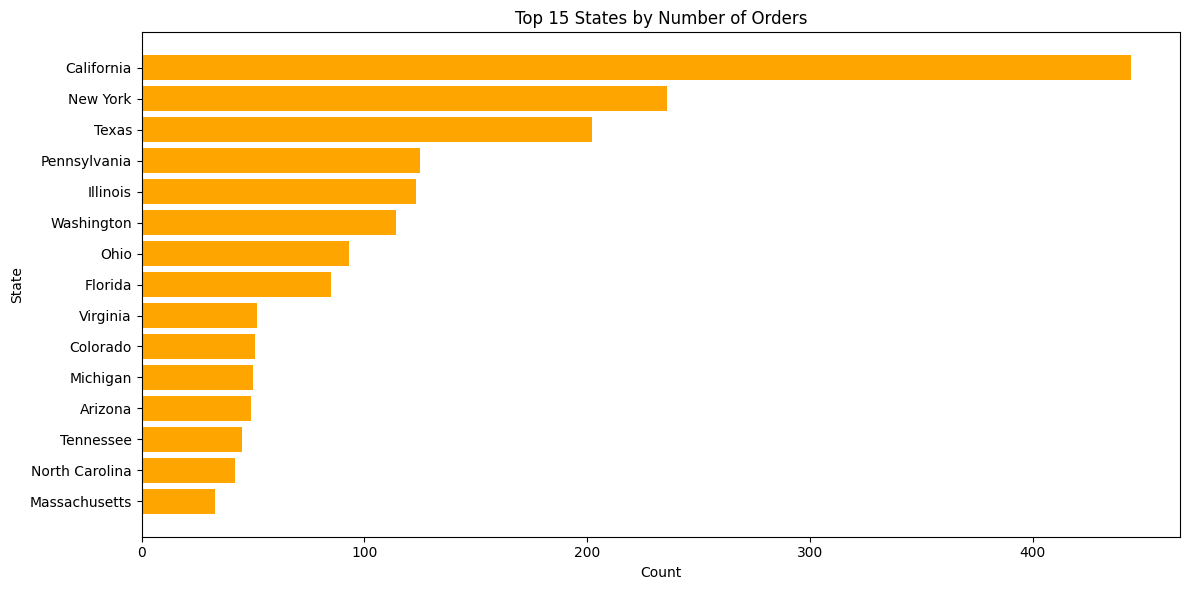

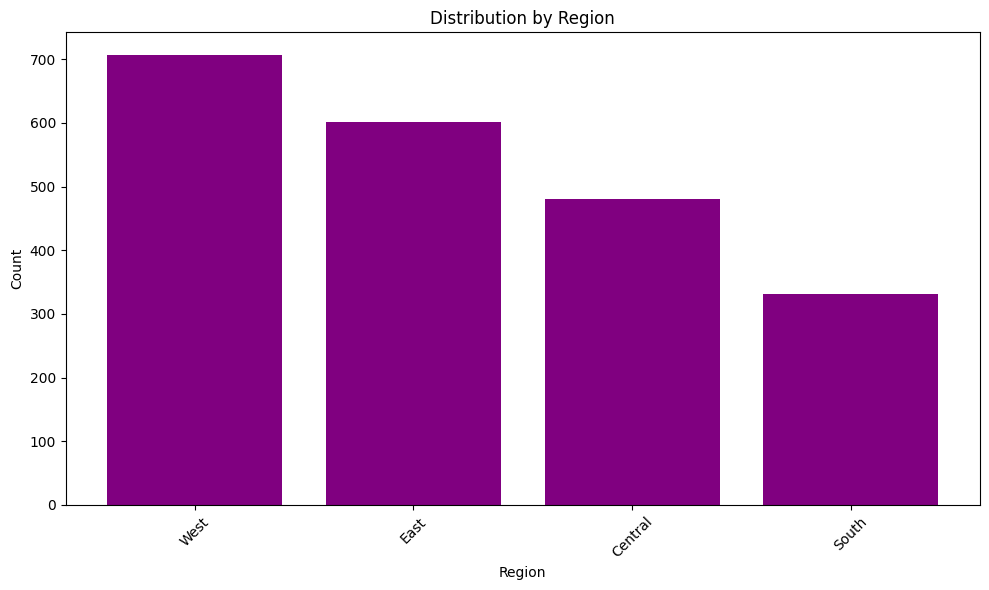

In [20]:
# City - Top 15 cities bar plot

plt.figure(figsize=(12, 6))
city_counts = df["City"].value_counts().head(15)
plt.barh(city_counts.index, city_counts.values, color="lightgreen")
plt.title("Top 15 Cities by Number of Orders")
plt.xlabel("Count")
plt.ylabel("City")
plt.gca().invert_yaxis()  # Invert y-axis to show highest at top
plt.tight_layout()
plt.show()

# State - Top 15 states bar plot
plt.figure(figsize=(12, 6))
state_counts = df["State"].value_counts().head(15)
plt.barh(state_counts.index, state_counts.values, color="orange")
plt.title("Top 15 States by Number of Orders")
plt.xlabel("Count")
plt.ylabel("State")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

# Region - Bar plot
plt.figure(figsize=(10, 6))
# Vertical bar chart
region_counts = df["Region"].value_counts()
plt.bar(region_counts.index, region_counts.values, color="purple")
plt.title("Distribution by Region")
plt.xlabel("Region")
plt.ylabel("Count")
plt.tick_params(axis="x", rotation=45)


plt.tight_layout()
plt.show()

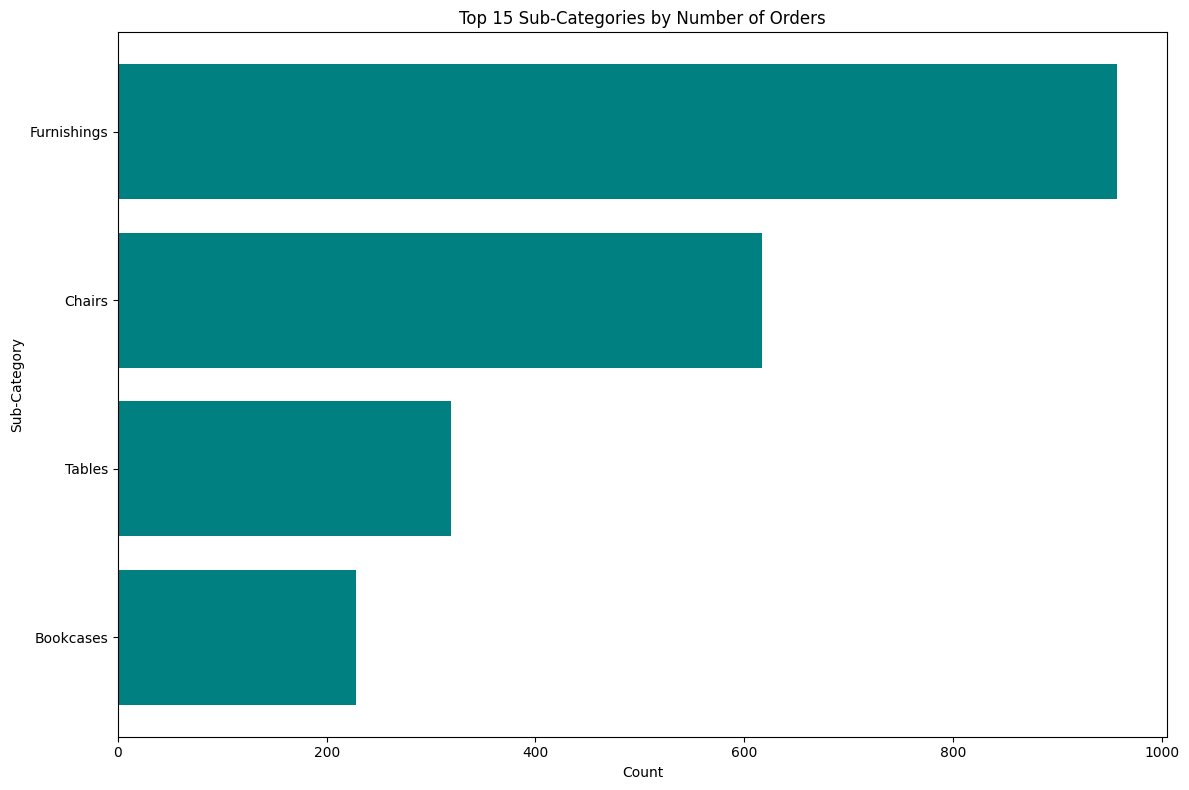

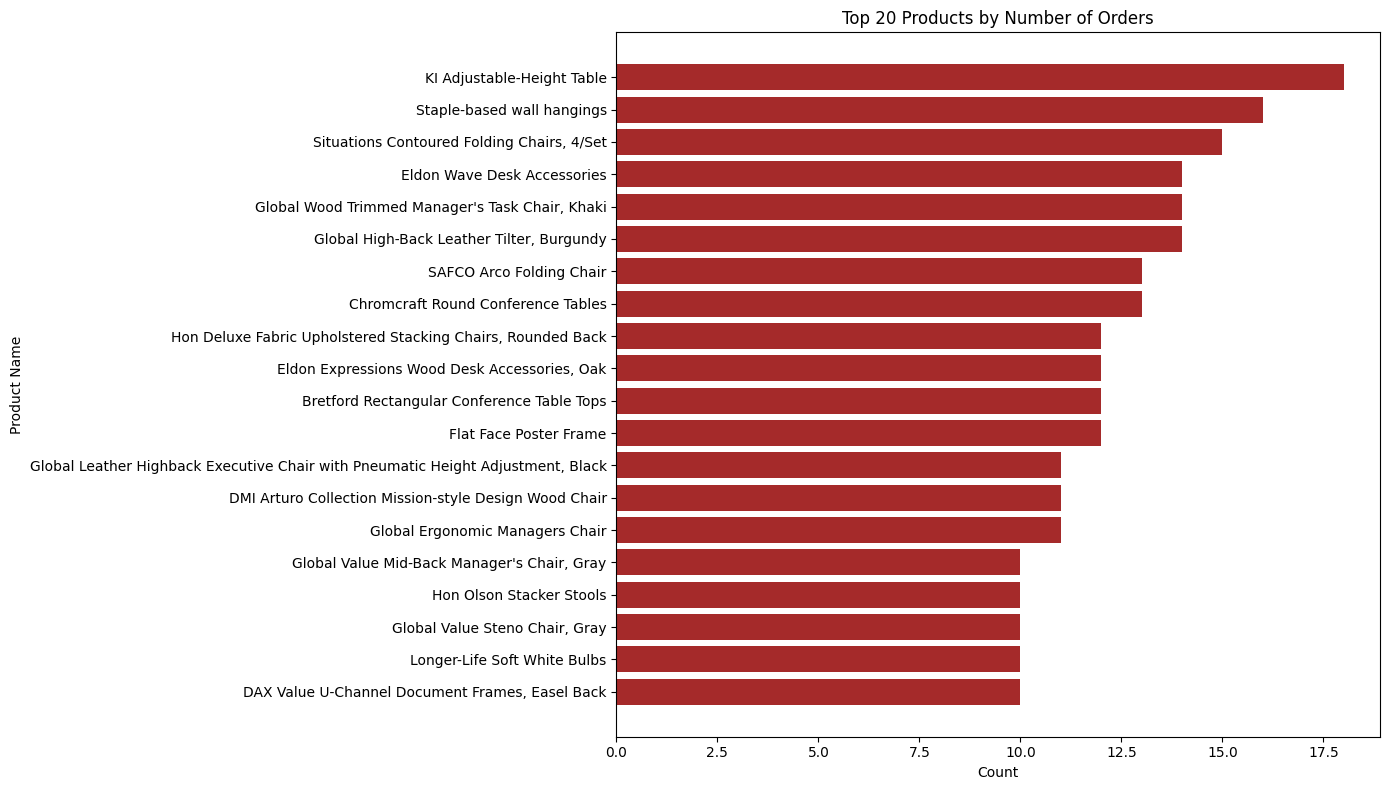

In [21]:
# Sub-Category - Top 15 sub-categories
plt.figure(figsize=(12, 8))
subcategory_counts = df["Sub-Category"].value_counts().head(15)
plt.barh(subcategory_counts.index, subcategory_counts.values, color="teal")
plt.title("Top 15 Sub-Categories by Number of Orders")
plt.xlabel("Count")
plt.ylabel("Sub-Category")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

# Product Name - Top 20 products

plt.figure(figsize=(14, 8))
product_counts = df["Product Name"].value_counts().head(20)
plt.barh(product_counts.index, product_counts.values, color="brown")
plt.title("Top 20 Products by Number of Orders")
plt.xlabel("Count")
plt.ylabel("Product Name")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

### Visulize time-series data

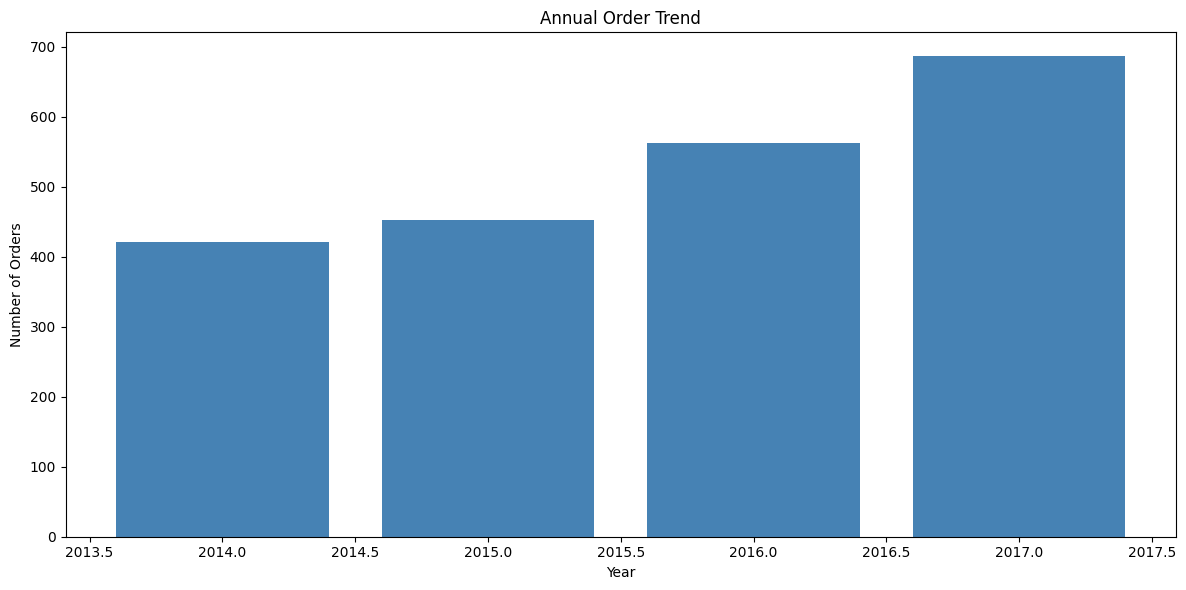

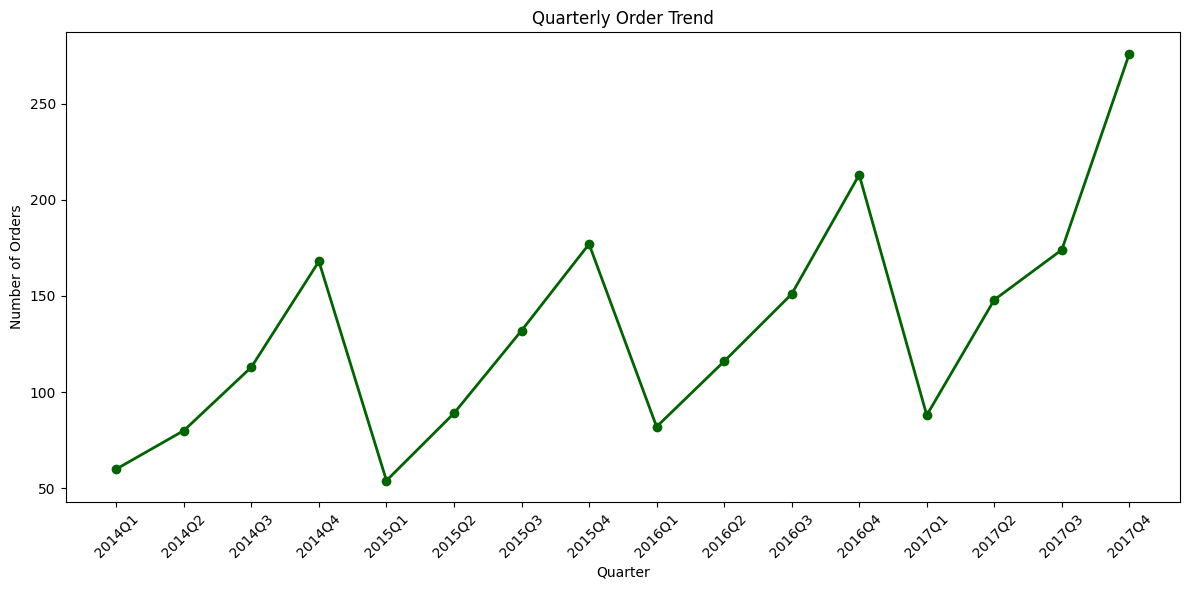

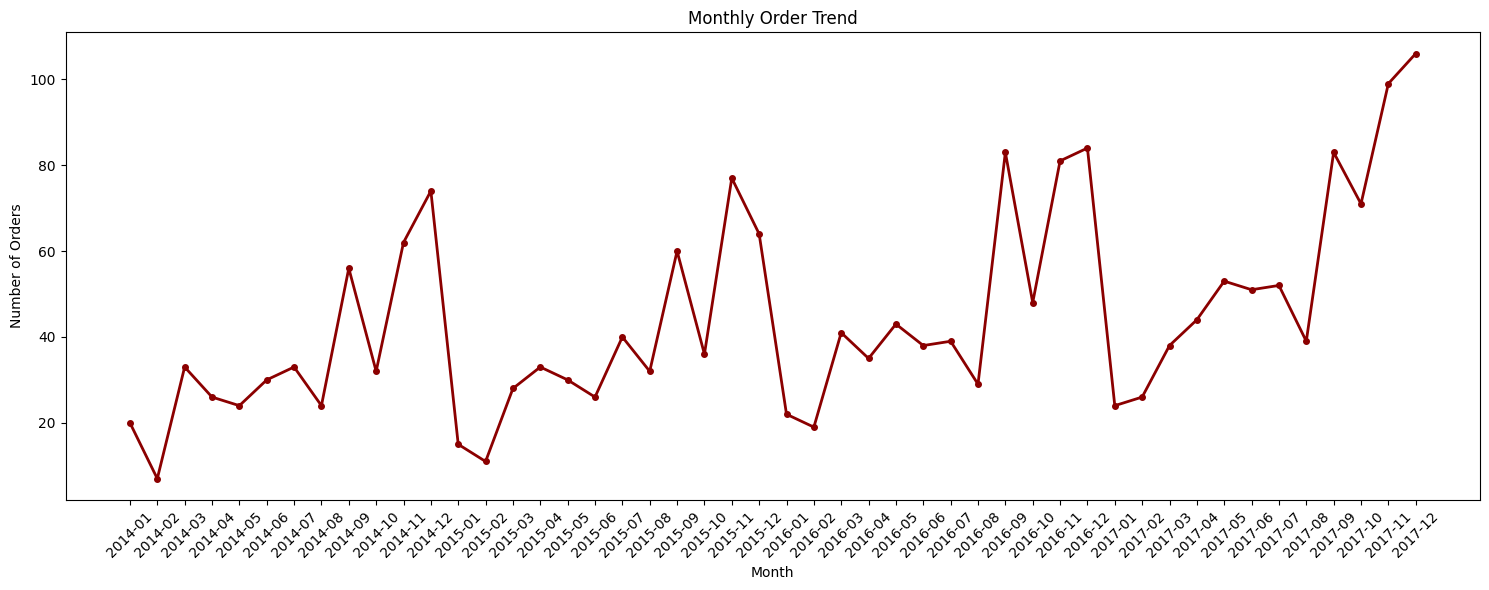

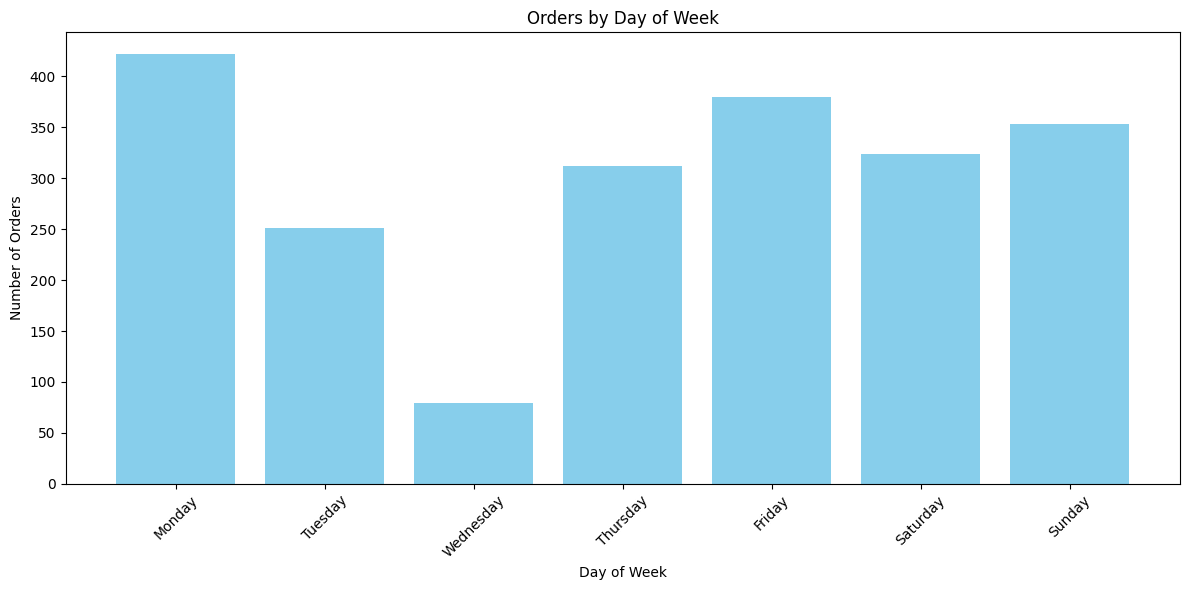

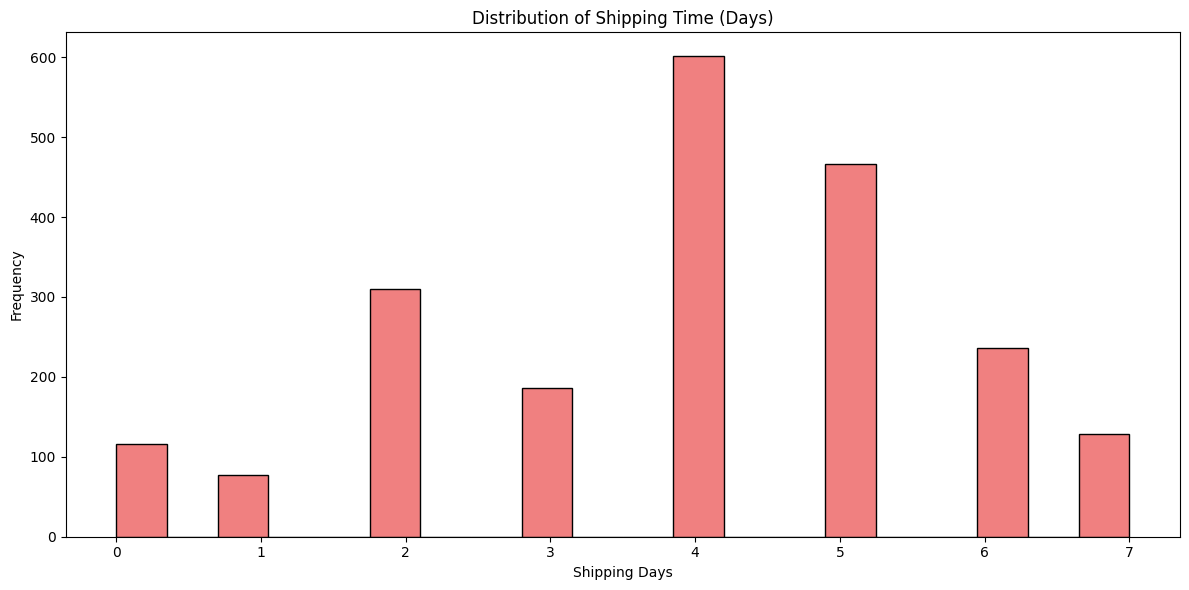

In [22]:
# Yearly trend
plt.figure(figsize=(12, 6))
yearly_orders = df["Order_Year"].value_counts().sort_index()
plt.bar(yearly_orders.index, yearly_orders.values, color="steelblue")
plt.title("Annual Order Trend")
plt.xlabel("Year")
plt.ylabel("Number of Orders")
plt.tight_layout()
plt.show()

# Quarterly trend
plt.figure(figsize=(12, 6))
quarterly_orders = df["Year_Quarter"].value_counts().sort_index()
plt.plot(
    quarterly_orders.index.astype(str),
    quarterly_orders.values,
    marker="o",
    linewidth=2,
    markersize=6,
    color="darkgreen",
)
plt.title("Quarterly Order Trend")
plt.xlabel("Quarter")
plt.ylabel("Number of Orders")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Monthly trend
plt.figure(figsize=(15, 6))
monthly_orders = df["Year_Month"].value_counts().sort_index()
plt.plot(
    monthly_orders.index.astype(str),
    monthly_orders.values,
    marker="o",
    linewidth=2,
    markersize=4,
    color="darkred",
)
plt.title("Monthly Order Trend")
plt.xlabel("Month")
plt.ylabel("Number of Orders")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Day of week analysis
plt.figure(figsize=(12, 6))
weekday_order = [
    "Monday",
    "Tuesday",
    "Wednesday",
    "Thursday",
    "Friday",
    "Saturday",
    "Sunday",
]
weekday_counts = df["Order_Weekday"].value_counts().reindex(weekday_order)
plt.bar(weekday_counts.index, weekday_counts.values, color="skyblue")
plt.title("Orders by Day of Week")
plt.xlabel("Day of Week")
plt.ylabel("Number of Orders")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Shipping time analysis
plt.figure(figsize=(12, 6))
plt.hist(df["Shipping_Days"], bins=20, color="lightcoral", edgecolor="black")
plt.title("Distribution of Shipping Time (Days)")
plt.xlabel("Shipping Days")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

## 3. Clean data


### Missing data

In [23]:
df.isnull().sum()

Row ID               0
Order ID             0
Order Date           0
Ship Date            0
Ship Mode            0
Customer ID          0
Customer Name        0
Segment              0
Country              0
City                 0
State                0
Postal Code          0
Region               0
Product ID           0
Category             0
Sub-Category         0
Product Name         0
Sales                0
Quantity             0
Discount             0
Profit               0
Shipping_Days        0
Order_Year           0
Order_Quarter        0
Order_Month          0
Order_Month_Name     0
Order_Week           0
Order_Day            0
Order_Weekday        0
Order_Weekday_Num    0
Year_Month           0
Year_Quarter         0
Year_Week            0
dtype: int64

There is no missing data

### **Variables Removed:**

I will drop some columns:

**1. Identifier Variables**: unique identifiers provide no meaningful patterns for prediction

- `Row ID`, `Order ID`, `Customer ID`, `Customer Name`, `Product ID`, `Product Name`, `Postal Code`


**2. Non-Variant Features**: cannot distinguish between observations

- `Category`, `Country` (single unique values)

**3. Geographic Optimization**: State provides best balance of geographic insight vs. model complexity

- **Kept:** `State` (49 unique values - optimal granularity)
- **Removed:** `Region` (4 values - too broad), `City` (531 values - too granular)

**4. Date variables**

- **Kept:** Order Year, Quarter, Month, Shipping Days
- **Removed:** Raw dates, detailed time components

In [24]:
df_significant = df.drop(
    columns=[
        "Row ID",
        "Order ID",
        "Customer ID",
        "Customer Name",
        "Product ID",
        "Product Name",
        "Category",
        "Country",
        "Postal Code",
        "Region",
        "City",
        "Order Date",
        "Ship Date",
        "Order_Month_Name",
        "Order_Week",
        "Order_Day",
        "Order_Weekday",
        "Order_Weekday_Num",
        "Year_Month",
        "Year_Quarter",
        "Year_Week",
    ]
)

### Outlier

Using **Interquartile Range (IQR)** method to identify outliers systematically across numerical features.

**IQR Formula:** `Outlier if value < Q1 - 1.5×IQR or value > Q3 + 1.5×IQR`

In [25]:
numerical_features = ["Sales", "Quantity", "Discount", "Profit"]

# Detect outliers using IQR for each numerical feature
for feature in numerical_features:
    Q1 = df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    IQR = Q3 - Q1

    # Define lower and upper bounds
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Filter outliers
    outliers = df[(df[feature] < lower_bound) | (df[feature] > upper_bound)]

    print(f"Feature: {feature}")
    print(f"Number of Outliers: {outliers.shape[0]}")

Feature: Sales
Number of Outliers: 164
Feature: Quantity
Number of Outliers: 39
Feature: Discount
Number of Outliers: 0
Feature: Profit
Number of Outliers: 407


#### **1. Discount: No Outliers**

- I retain all values because all values are in expected business ranges.

#### **2. Quantity: 39 Outliers**

- I also retain all values including outliers because large quantity orders represent legitimate bulk business transactions.

#### **3. Sales: 164 Outliers**

- I apply log transformation to normalize distribution.

#### **4. Profit: Numerous Outliers**

- I remove outlier observations using IQR method.

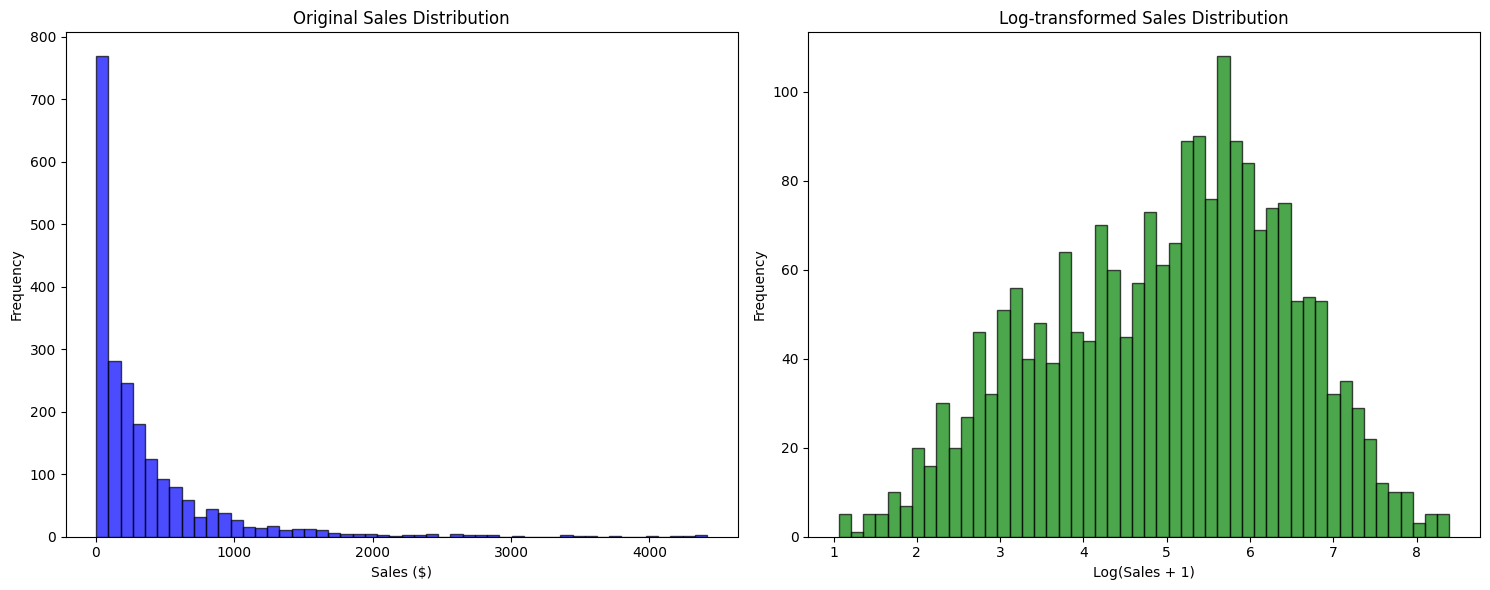

In [26]:
# Apply log transformation to Sales to normalize distribution
df_significant["Sales_log"] = np.log1p(df_significant["Sales"])

# Visualize the transformation
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Original Sales distribution
ax1.hist(df_significant["Sales"], bins=50, alpha=0.7, color="blue", edgecolor="black")
ax1.set_title(f"Original Sales Distribution")
ax1.set_xlabel("Sales ($)")
ax1.set_ylabel("Frequency")

# Log-transformed Sales distribution
ax2.hist(
    df_significant["Sales_log"], bins=50, alpha=0.7, color="green", edgecolor="black"
)
ax2.set_title(f"Log-transformed Sales Distribution")
ax2.set_xlabel("Log(Sales + 1)")
ax2.set_ylabel("Frequency")

plt.tight_layout()
plt.show()

df_significant = df_significant.drop(columns=["Sales"])

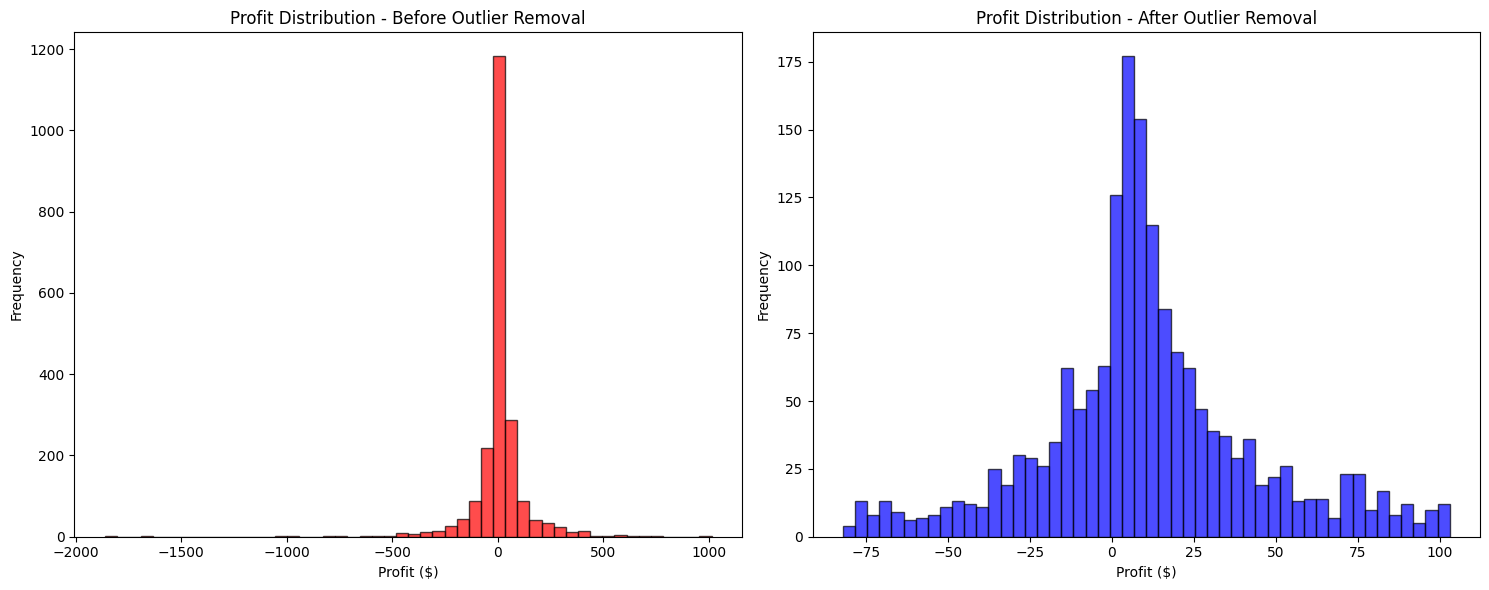

In [27]:
# Remove Profit outliers using IQR method
Q1_profit = df_significant["Profit"].quantile(0.25)
Q3_profit = df_significant["Profit"].quantile(0.75)
IQR_profit = Q3_profit - Q1_profit
lower_bound_profit = Q1_profit - 1.5 * IQR_profit
upper_bound_profit = Q3_profit + 1.5 * IQR_profit

# Identify outliers
profit_outliers_mask = (df_significant["Profit"] < lower_bound_profit) | (
    df_significant["Profit"] > upper_bound_profit
)

# Remove outliers
df_cleaned = df_significant[~profit_outliers_mask].copy()

# Visualize before and after
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Before outlier removal
ax1.hist(df_significant["Profit"], bins=50, alpha=0.7, color="red", edgecolor="black")
ax1.set_title(f"Profit Distribution - Before Outlier Removal")
ax1.set_xlabel("Profit ($)")
ax1.set_ylabel("Frequency")

# After outlier removal
ax2.hist(df_cleaned["Profit"], bins=50, alpha=0.7, color="blue", edgecolor="black")
ax2.set_title(f"Profit Distribution - After Outlier Removal")
ax2.set_xlabel("Profit ($)")
ax2.set_ylabel("Frequency")

plt.tight_layout()
plt.show()

### One-Hot Encoding Implementation

In [28]:
# One-hot encoding for categorical variables
categorical_vars = [
    "Ship Mode",
    "Segment",
    "State",
    "Sub-Category",
    "Order_Year",
    "Order_Quarter",
    "Order_Month",
]

# Apply one-hot encoding
df_encoded = pd.get_dummies(
    df_cleaned, columns=categorical_vars, drop_first=True, dtype=int
)

df_encoded.head()

,Quantity,Discount,Profit,Shipping_Days,Sales_log,Ship Mode_Same Day,Ship Mode_Second Class,Ship Mode_Standard Class,Segment_Corporate,Segment_Home Office,...,Order_Month_3,Order_Month_4,Order_Month_5,Order_Month_6,Order_Month_7,Order_Month_8,Order_Month_9,Order_Month_10,Order_Month_11,Order_Month_12
0,2,0.0,41.9136,3,5.572002,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,7,0.0,14.1694,5,3.909219,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
4,9,0.2,85.3092,5,7.442601,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
5,2,0.3,-1.0196,2,4.281819,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
8,3,0.2,15.5250,4,4.829912,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0


## 4. Identify correlated variables


In [29]:
# Identify different types of variables
continuous_vars = ["Quantity", "Discount", "Profit", "Shipping_Days", "Sales_log"]
binary_vars = [col for col in df_encoded.columns if col not in continuous_vars]

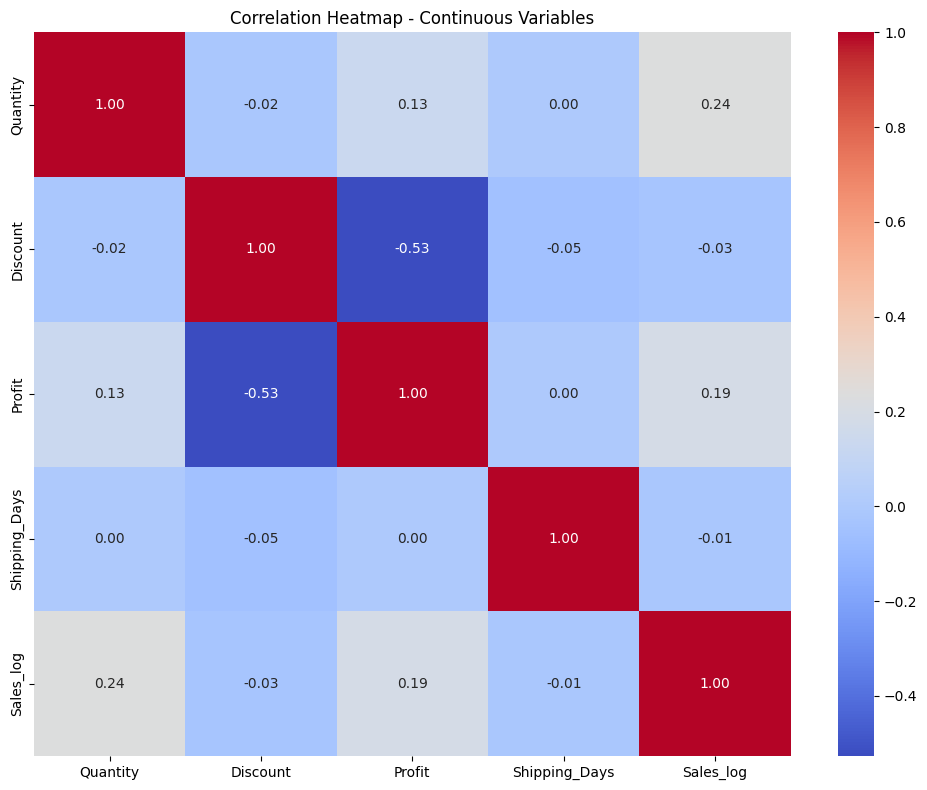

In [30]:
# Calculate correlation matrix
corr_matrix_continuous = df_encoded[continuous_vars].corr()

# Visualize correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix_continuous, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Heatmap - Continuous Variables")
plt.tight_layout()
plt.show()

**Profit vs. Discount**: Strong negative correlation (-0.53), confirming the expected business relationship where higher discounts reduce profit margins


In [31]:
# Calculate correlations between continuous and binary variables
continuous_binary_corr = df_encoded[continuous_vars].corrwith(
    df_encoded[binary_vars].mean(axis=1)
)

# Find top correlations with binary variables
top_binary_correlations = []

for cont_var in continuous_vars:
    for bin_var in binary_vars:
        corr_value = df_encoded[cont_var].corr(df_encoded[bin_var])
        if abs(corr_value) > 0.1:  # Only show correlations > 0.1
            top_binary_correlations.append((cont_var, bin_var, corr_value))

# Sort by absolute correlation value
top_binary_correlations.sort(key=lambda x: abs(x[2]), reverse=True)

print(f"TOP 15 CORRELATIONS between continuous and binary variables:")
for i, (cont_var, bin_var, corr) in enumerate(top_binary_correlations[:15]):
    direction = "positive" if corr > 0 else "negative"
    print(f"{i+1:2}. {cont_var} ↔ {bin_var}: {corr:.3f} ({direction})")

TOP 15 CORRELATIONS between continuous and binary variables:
 1. Shipping_Days ↔ Ship Mode_Standard Class: 0.720 (positive)
 2. Sales_log ↔ Sub-Category_Furnishings: -0.692 (negative)
 3. Shipping_Days ↔ Ship Mode_Same Day: -0.538 (negative)
 4. Discount ↔ State_Texas: 0.520 (positive)
 5. Sales_log ↔ Sub-Category_Chairs: 0.462 (positive)
 6. Discount ↔ State_Illinois: 0.440 (positive)
 7. Profit ↔ State_Texas: -0.317 (negative)
 8. Profit ↔ State_Illinois: -0.240 (negative)
 9. Sales_log ↔ Sub-Category_Tables: 0.225 (positive)
10. Discount ↔ State_California: -0.181 (negative)
11. Shipping_Days ↔ Ship Mode_Second Class: -0.179 (negative)
12. Discount ↔ State_New York: -0.172 (negative)
13. Discount ↔ Sub-Category_Furnishings: -0.170 (negative)
14. Profit ↔ State_Pennsylvania: -0.149 (negative)
15. Profit ↔ State_Virginia: 0.143 (positive)


1. **Shipping_Days vs. Ship Mode**: High correlation detected between the engineered Shipping_Days feature and Ship Mode categories

   - **Action Required**: Remove Shipping_Days to avoid redundancy and multicollinearity
   - **Rationale**: Ship Mode already captures shipping speed information effectively

2. **Sub-Category Performance**:

   - **Furnishings**: Shows notably higher sales correlation, indicating this category drives significant revenue


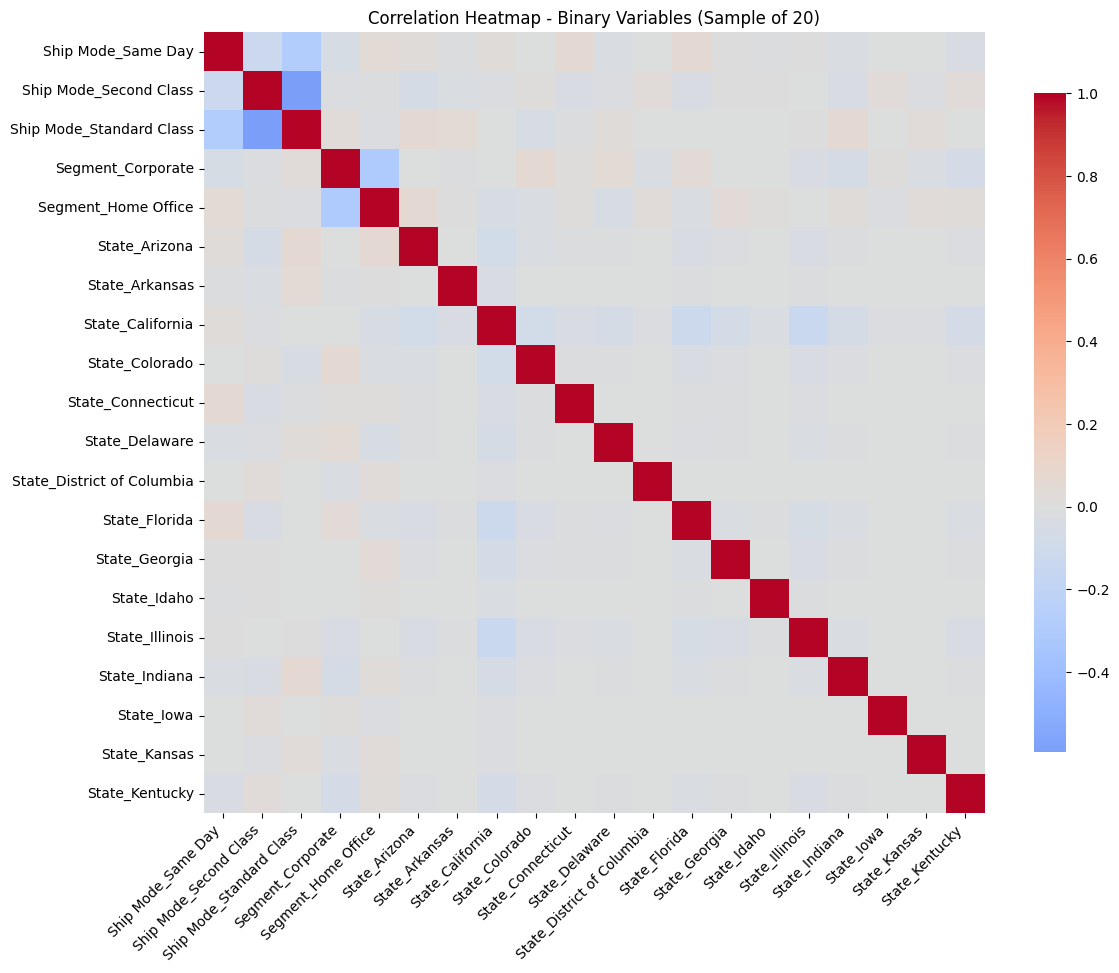

In [32]:
# Calculate correlation matrix for binary variables (sample to avoid memory issues)
# Take a subset of binary variables for analysis
sample_binary_vars = binary_vars[:20] if len(binary_vars) > 20 else binary_vars

binary_corr_matrix = df_encoded[sample_binary_vars].corr()

# Find high correlations among binary variables
high_binary_correlations = []
for i in range(len(sample_binary_vars)):
    for j in range(i + 1, len(sample_binary_vars)):
        corr_value = binary_corr_matrix.iloc[i, j]
        if abs(corr_value) > 0.8:  # High correlation threshold
            var1 = sample_binary_vars[i]
            var2 = sample_binary_vars[j]
            high_binary_correlations.append((var1, var2, corr_value))

# Visualize correlation matrix for binary variables
plt.figure(figsize=(12, 10))
sns.heatmap(
    binary_corr_matrix,
    annot=False,  # Too many variables to annotate
    cmap="coolwarm",
    center=0,
    square=True,
    cbar_kws={"shrink": 0.8},
)
plt.title(
    f"Correlation Heatmap - Binary Variables (Sample of {len(sample_binary_vars)})"
)
plt.xticks(rotation=45, ha="right")
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

No high correlations (>0.8) detected among one-hot encoded binary variables. All encoded features can be safely included in machine learning models without multicollinearity concerns


## 5. Summary
Read Summary.txt file